In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#list_names = ['User1', 'User3','User4', 'User5', 'User6']#, 'User7']
list_names = ['User3', 'User3']#,'User4', 'User5', 'User6']#, 'User7']

nbUsers = len(list_names)

list_beta = [1.05]
list_gamma = [0]

nbBetaGamma = len(list_beta)

addword = '3s-PosClosest'

In [2]:
nbUsers

2

In [3]:
boneNames = []
bones = pd.Series()
bones = pd.read_csv('./BoneNames.csv')
bones = bones.transpose()
bones = bones.drop(bones.index[0])
for i in range(0, 19):
    boneNames.append('R-' + bones.iloc[0, i])
for i in range(0, 19):
    boneNames.append('L-' + bones.iloc[0, i])
    
for i in range(0, len(boneNames)):
    txt = boneNames[i]
    boneNames[i] = txt.replace('_CapsuleCollider', '')

In [5]:
globalAnalysis = pd.DataFrame()
analysisPerObj = pd.DataFrame()
objects = ['obj0', 'obj1', 'obj2', 'obj3', 'obj4', 'obj5', 'obj6', 'Cube', 'Cylinder']
analysisPerTask = pd.DataFrame()
tasks = ['Touch', 'Raise', 'Pull', 'Push', 'Push Down']
analysisPerScale = pd.DataFrame()
scales = ['small', 'medium', 'large']

for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-'+list_names[j]+ addword+ '.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        #betaGammaSummary = pd.merge(betaGammaTime, betaGammaSuccess, how = 'inner', on = 'Tolerance')
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        globalAnalysis = pd.concat([betaGammaSummary, globalAnalysis], axis = 0, sort = True)


for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perObject-'+list_names[j]+ addword+'.csv', sep = ";", decimal = '.')


        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        #betaGammaSummary = pd.merge(betaGammaTime, betaGammaSuccess, how = 'inner', on = 'Tolerance')
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisPerObj = pd.concat([betaGammaSummary, analysisPerObj], axis = 0, sort = True)


for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perTask-'+list_names[j]+ addword+'.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisPerTask = pd.concat([betaGammaSummary, analysisPerTask], axis = 0, sort = True)


for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perScale-'+list_names[j]+ addword+'.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisPerScale = pd.concat([betaGammaSummary, analysisPerScale], axis = 0, sort = True)




In [6]:
analysisBoneDistPerScale = pd.DataFrame()
analysisBoneDistPerObj = pd.DataFrame()
analysisBoneDistPerTask = pd.DataFrame()


for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perObject-BoneDist-'+list_names[j]+ addword+'.csv', sep = ";", decimal = '.')


        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        #betaGammaSummary = pd.merge(betaGammaTime, betaGammaSuccess, how = 'inner', on = 'Tolerance')
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisBoneDistPerObj = pd.concat([betaGammaSummary, analysisBoneDistPerObj], axis = 0, sort = True)

    
for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perTask-BoneDist-'+list_names[j]+ addword+'.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisBoneDistPerTask = pd.concat([betaGammaSummary, analysisBoneDistPerTask], axis = 0, sort = True)

    
for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perScale-BoneDist-'+list_names[j]+ addword+'.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisBoneDistPerScale = pd.concat([betaGammaSummary, analysisBoneDistPerScale], axis = 0, sort = True)

    

In [ ]:
#This is the mean over all the users
meanUsers = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    for tol in range(0, 180):
        meanUsersBeta = pd.DataFrame()
        cond = (globalAnalysis['Tolerance'] == globalAnalysis['Tolerance'].iloc[tol]) & (globalAnalysis['Beta'] == list_beta[paramB]) & (globalAnalysis['Gamma'] == list_gamma[paramB])
        meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
        meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    
        for j in range(0, 38):
            meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Phalanx.'+str(j)] = globalAnalysis[cond]['Phalanx.'+str(j)].mean()
            meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'BoneDist.'+str(j)] = globalAnalysis[cond]['BoneDist.'+str(j)].mean()
            meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Speed.'+str(j)] = abs(globalAnalysis[cond]['Speed.'+str(j)].mean())

            meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
            meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    
        meanUsers = pd.concat([meanUsersBeta, meanUsers], axis = 0, sort = True)
            

In [ ]:
meanUsers.index

In [ ]:
meanPerObj = pd.DataFrame()
meanPerTask = pd.DataFrame()
meanPerScale = pd.DataFrame()


for paramB in range(0, nbBetaGamma):
    for tol in range(0, 180):
        meanPerObjB = pd.DataFrame()
        meanPerScaleB = pd.DataFrame()
        meanPerTaskB = pd.DataFrame()
        
        cond = (analysisPerScale['Tolerance'] == analysisPerScale['Tolerance'].iloc[tol]) & (analysisPerScale['Beta'] == list_beta[paramB]) & (analysisPerScale['Gamma'] == list_gamma[paramB])
        meanPerObjB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
        meanPerObjB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    
        
        meanPerScaleB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
        meanPerScaleB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    

        meanPerTaskB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
        meanPerTaskB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    

        for j in range(0, len(objects)):
            meanPerObjB.loc[globalAnalysis['Tolerance'].iloc[tol], objects[j]] = analysisPerObj[cond][objects[j]].mean()
        meanPerObj = pd.concat([meanPerObjB, meanPerObj], axis = 0, sort = True)
        
        for j in range(0, len(tasks)):
            meanPerTaskB.loc[globalAnalysis['Tolerance'].iloc[tol], tasks[j]] = analysisPerTask[cond][tasks[j]].mean()
        meanPerTask = pd.concat([meanPerTaskB, meanPerTask], axis = 0, sort = True)
        
        for j in range(0, len(scales)):
            meanPerScaleB.loc[globalAnalysis['Tolerance'].iloc[tol], scales[j]] = analysisPerScale[cond][scales[j]].mean()
        meanPerScale = pd.concat([meanPerScaleB, meanPerScale], axis = 0, sort = True)
        
        
           

In [ ]:
allConfig = pd.DataFrame()

for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-AllConfigTypes-'+list_names[j]+ addword+'.csv', sep = ";", decimal = '.')

        betaGammaTime['Config'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Config'])
        betaGammaSummary = betaGammaTime
        #betaGammaSummary.index = betaGammaSummary['Tolerance']
        #betaGammaSummary['Beta'] = float(beta)
        #betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        allConfig = pd.concat([betaGammaSummary, allConfig], axis = 0, sort = True)

In [ ]:
allConfig.head()

In [ ]:
#Mean per config, All users?

In [ ]:
meanPerScale.tail()

In [ ]:
globalAnalysis

In [ ]:
analysisPerTask.head()

In [ ]:
globalAnalysis.iloc[1]

In [ ]:
tol = 0
for user in range(0, nbUsers):
    cond = (globalAnalysis['Tolerance'] == tol) & (globalAnalysis['User'] == list_names[user])
    nbPhal = 0
    totalFingerTips = 0
    totalBones = 0
    for fingertip in range(6, 19, 3):
        if(np.isnan(globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()) == False):
            nbPhal = nbPhal + 1
            totalFingerTips = totalFingerTips + globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()
            totalBones = totalBones + globalAnalysis[cond]['BoneDist.'+str(fingertip)].dropna().mean()

    globalAnalysis.loc[tol, 'R-FingerTips_'+str(list_names[user])] = totalFingerTips/nbPhal
    globalAnalysis.loc[tol, 'R-BonesFingerTips_'+str(list_names[user])] = totalBones/nbPhal

for tol in range(100, 3050, 10):
    for user in range(0, nbUsers):
        cond = (globalAnalysis['Tolerance'] == tol) & (globalAnalysis['User'] == list_names[user])
        nbPhal = 0
        totalFingerTips = 0
        totalBones = 0
        for fingertip in range(6, 19, 3):
            if(np.isnan(globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()) == False):
                nbPhal = nbPhal + 1
                totalFingerTips = totalFingerTips + globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()
                totalBones = totalBones + globalAnalysis[cond]['BoneDist.'+str(fingertip)].dropna().mean()

        globalAnalysis.loc[tol, 'R-FingerTips_'+str(list_names[user])] = totalFingerTips/nbPhal
        globalAnalysis.loc[tol, 'R-BonesFingerTips_'+str(list_names[user])] = totalBones/nbPhal

tol = 0
for user in range(0, nbUsers):
    cond = (globalAnalysis['Tolerance'] == tol) & (globalAnalysis['User'] == list_names[user])
    nbPhal = 0
    totalFingerTips = 0
    totalBones = 0
    for fingertip in range(25, 38, 3):
        if(np.isnan(globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()) == False):
            nbPhal = nbPhal + 1
            totalFingerTips = totalFingerTips + globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()
            totalBones = totalBones + globalAnalysis[cond]['BoneDist.'+str(fingertip)].dropna().mean()

    globalAnalysis.loc[tol, 'L-FingerTips_'+str(list_names[user])] = totalFingerTips/nbPhal
    globalAnalysis.loc[tol, 'L-BonesFingerTips_'+str(list_names[user])] = totalBones/nbPhal

for tol in range(100, 3050, 10):
    for user in range(0, nbUsers):
        cond = (globalAnalysis['Tolerance'] == tol) & (globalAnalysis['User'] == list_names[user])
        nbPhal = 0
        totalFingerTips = 0
        totalBones = 0
        for fingertip in range(25, 38, 3):
            if(np.isnan(globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()) == False):
                nbPhal = nbPhal + 1
                totalFingerTips = totalFingerTips + globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()
                totalBones = totalBones + globalAnalysis[cond]['BoneDist.'+str(fingertip)].dropna().mean()

        globalAnalysis.loc[tol, 'L-FingerTips_'+str(list_names[user])] = totalFingerTips/nbPhal
        globalAnalysis.loc[tol, 'L-BonesFingerTips_'+str(list_names[user])] = totalBones/nbPhal



In [ ]:
for user in range(0, nbUsers):
    cond = globalAnalysis['User'] == list_names[user]
    globalAnalysis.loc[cond, 'R-FingerTips'] = globalAnalysis[cond]['R-FingerTips_'+str(list_names[user])]
    globalAnalysis.loc[cond,'R-BonesFingerTips'] = globalAnalysis[cond]['R-BonesFingerTips_'+str(list_names[user])]
    globalAnalysis.loc[cond, 'L-FingerTips'] = globalAnalysis[cond]['L-FingerTips_'+str(list_names[user])]
    globalAnalysis.loc[cond,'L-BonesFingerTips'] = globalAnalysis[cond]['L-BonesFingerTips_'+str(list_names[user])]
    
    

In [ ]:
plt.figure(figsize = (20, 10))
#for user in range(0, nbUsers):
#    cond = (globalAnalysis['User'] == list_names[user])

sns.lineplot( x = 'Tolerance', y = 'R-FingerTips', data = globalAnalysis, label = 'PredictR')#+str(list_names[user]))
sns.lineplot( x = 'Tolerance', y = 'R-BonesFingerTips', data = globalAnalysis, label = 'BonesR')#+str(list_names[user]))

#sns.lineplot( x = 'Tolerance', y = 'L-FingerTips', data = globalAnalysis, label = 'PredictL')#+str(list_names[user]))
#sns.lineplot( x = 'Tolerance', y = 'L-BonesFingerTips', data = globalAnalysis, label = 'BonesL')#+str(list_names[user]))
plt.title('All right fingertips')
plt.ylim(0,200)
plt.legend()

In [49]:
tol = 0
for user in range(0, nbUsers):
    cond = (globalAnalysis['Tolerance'] == tol) & (globalAnalysis['User'] == list_names[user])
    nbPhal = 0
    totalFingerTips = 0
    totalBones = 0
    for fingertip in range(0, 19):
        if(np.isnan(globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()) == False):
            nbPhal = nbPhal + 1
            totalFingerTips = totalFingerTips + globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()
            totalBones = totalBones + globalAnalysis[cond]['BoneDist.'+str(fingertip)].dropna().mean()

    globalAnalysis.loc[tol, 'R-FingerTips_'+str(list_names[user])] = totalFingerTips/nbPhal
    globalAnalysis.loc[tol, 'R-BonesFingerTips_'+str(list_names[user])] = totalBones/nbPhal

for tol in range(100, 3050, 10):
    for user in range(0, nbUsers):
        cond = (globalAnalysis['Tolerance'] == tol) & (globalAnalysis['User'] == list_names[user])
        nbPhal = 0
        totalFingerTips = 0
        totalBones = 0
        for fingertip in range(0, 19):
            if(np.isnan(globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()) == False):
                nbPhal = nbPhal + 1
                totalFingerTips = totalFingerTips + globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()
                totalBones = totalBones + globalAnalysis[cond]['BoneDist.'+str(fingertip)].dropna().mean()

        globalAnalysis.loc[tol, 'R-FingerTips_'+str(list_names[user])] = totalFingerTips/nbPhal
        globalAnalysis.loc[tol, 'R-BonesFingerTips_'+str(list_names[user])] = totalBones/nbPhal

tol = 0
for user in range(0, nbUsers):
    cond = (globalAnalysis['Tolerance'] == tol) & (globalAnalysis['User'] == list_names[user])
    nbPhal = 0
    totalFingerTips = 0
    totalBones = 0
    for fingertip in range(25, 30, 3):
        if(np.isnan(globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()) == False):
            nbPhal = nbPhal + 1
            totalFingerTips = totalFingerTips + globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()
            totalBones = totalBones + globalAnalysis[cond]['BoneDist.'+str(fingertip)].dropna().mean()

    globalAnalysis.loc[tol, 'L-FingerTips_'+str(list_names[user])] = totalFingerTips/nbPhal
    globalAnalysis.loc[tol, 'L-BonesFingerTips_'+str(list_names[user])] = totalBones/nbPhal

for tol in range(100, 3050, 10):
    for user in range(0, nbUsers):
        cond = (globalAnalysis['Tolerance'] == tol) & (globalAnalysis['User'] == list_names[user])
        nbPhal = 0
        totalFingerTips = 0
        totalBones = 0
        for fingertip in range(25, 30, 3):
            if(np.isnan(globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()) == False):
                nbPhal = nbPhal + 1
                totalFingerTips = totalFingerTips + globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()
                totalBones = totalBones + globalAnalysis[cond]['BoneDist.'+str(fingertip)].dropna().mean()

        globalAnalysis.loc[tol, 'L-FingerTips_'+str(list_names[user])] = totalFingerTips/nbPhal
        globalAnalysis.loc[tol, 'L-BonesFingerTips_'+str(list_names[user])] = totalBones/nbPhal



In [50]:
for user in range(0, nbUsers):
    cond = globalAnalysis['User'] == list_names[user]
    globalAnalysis.loc[cond, 'R-FingerTips'] = globalAnalysis[cond]['R-FingerTips_'+str(list_names[user])]
    globalAnalysis.loc[cond,'R-BonesFingerTips'] = globalAnalysis[cond]['R-BonesFingerTips_'+str(list_names[user])]
    globalAnalysis.loc[cond, 'L-FingerTips'] = globalAnalysis[cond]['L-FingerTips_'+str(list_names[user])]
    globalAnalysis.loc[cond,'L-BonesFingerTips'] = globalAnalysis[cond]['L-BonesFingerTips_'+str(list_names[user])]
    
    

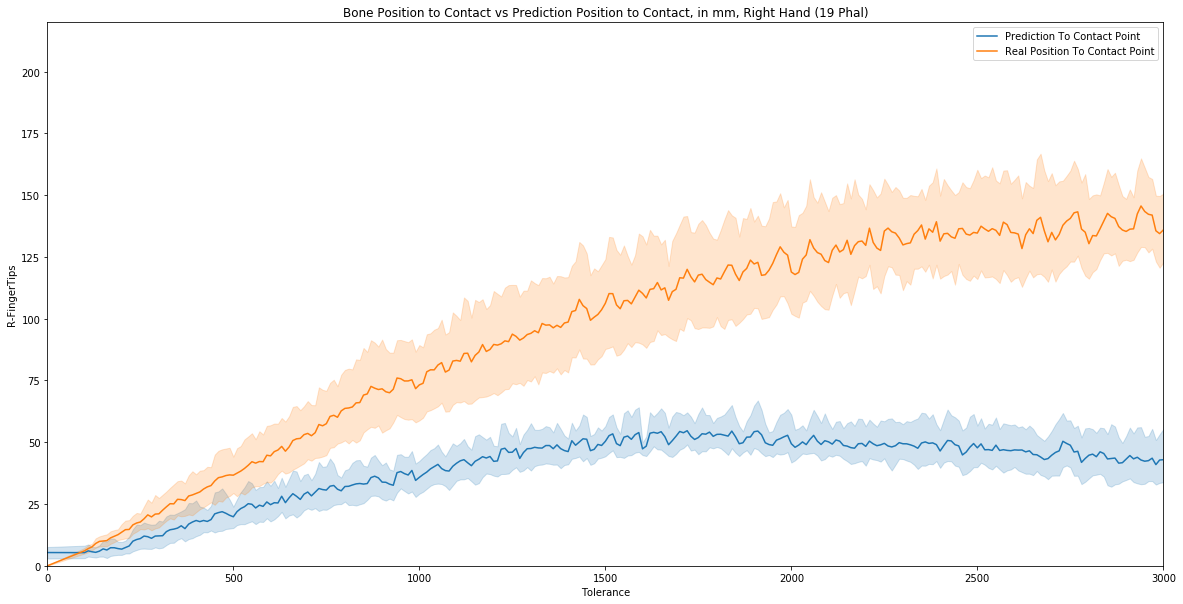

In [51]:
plt.figure(figsize = (20, 10))
#for user in range(0, nbUsers):
#    cond = (globalAnalysis['User'] == list_names[user])

sns.lineplot( x = 'Tolerance', y = 'R-FingerTips', data = globalAnalysis, label = 'Prediction To Contact Point')#+str(list_names[user]))
sns.lineplot( x = 'Tolerance', y = 'R-BonesFingerTips', data = globalAnalysis, label = 'Real Position To Contact Point')#+str(list_names[user]))

#sns.lineplot( x = 'Tolerance', y = 'L-FingerTips', data = globalAnalysis, label = 'PredictL')#+str(list_names[user]))
#sns.lineplot( x = 'Tolerance', y = 'L-BonesFingerTips', data = globalAnalysis, label = 'BonesL')#+str(list_names[user]))
plt.title('Bone Position to Contact vs Prediction Position to Contact, in mm, Right Hand (19 Phal)')
plt.xlim(0,3000)
plt.ylim(0,220)
plt.legend()

In [22]:
meanUsers.head()

Beta  BoneDist.0  BoneDist.1  BoneDist.10  BoneDist.11  BoneDist.12  \
580  1.05   38.742514   38.965968    42.570715    41.888410    40.613638   
570  1.05   36.929446   37.261822    43.158811    43.813296    40.774038   
560  1.05   38.763959   39.003255    40.684275    41.182679    39.971614   
550  1.05   44.008772   44.339969    39.002485    40.519526    37.719439   
540  1.05   41.591214   41.926358    39.444039    39.415467    36.835241   

     BoneDist.13  BoneDist.14  BoneDist.15  BoneDist.16  ...   Speed.34  \
580    41.869425    39.739588    40.107456    40.019102  ...  15.277488   
570    43.103648    41.797769    40.335083    44.129079  ...  16.476279   
560    39.426751    40.831747    39.721528    43.024244  ...   6.146203   
550    40.236361    43.024231    38.790164    47.109734  ...   3.006879   
540    41.307925    40.737376    39.436804    46.756635  ...  15.519969   

       Speed.35  Speed.36   Speed.37    Speed.4     Speed.5    Speed.6  \
580    0.000000  3.314498  36.374678   0.000000    4.644122  30.346323   
570    0.000000  9.377897   3.824911   2.064455  155.972102  11.119229   
560    0.000000  8.233506   3.853946   5.347760   82.332292  13.776224   
550    1.775093  8.031452   0.156381   5.032519   13.024884   1.720674   
540  156.873943  8.031452   9.202062  13.695190   11.974932   1.567520   

       Speed.7    Speed.8    Speed.9  
580   4.046520   0.228873   7.744626  
570   7.924279   9.759987  19.273103  
560  11.774559  18.853828  26.250414  
550   7.546561   1.678698  13.834844  
540  12.406657   2.782130   1.024936  

[5 rows x 116 columns]

In [23]:
analysisPerScale.index[:3300]

Int64Index([   0,  100,  110,  120,  130,  140,  150,  160,  170,  180,
            ...
            2950, 2960, 2970, 2980, 2990, 3000, 3010, 3020, 3030, 3040],
           dtype='int64', name='Tolerance', length=2072)

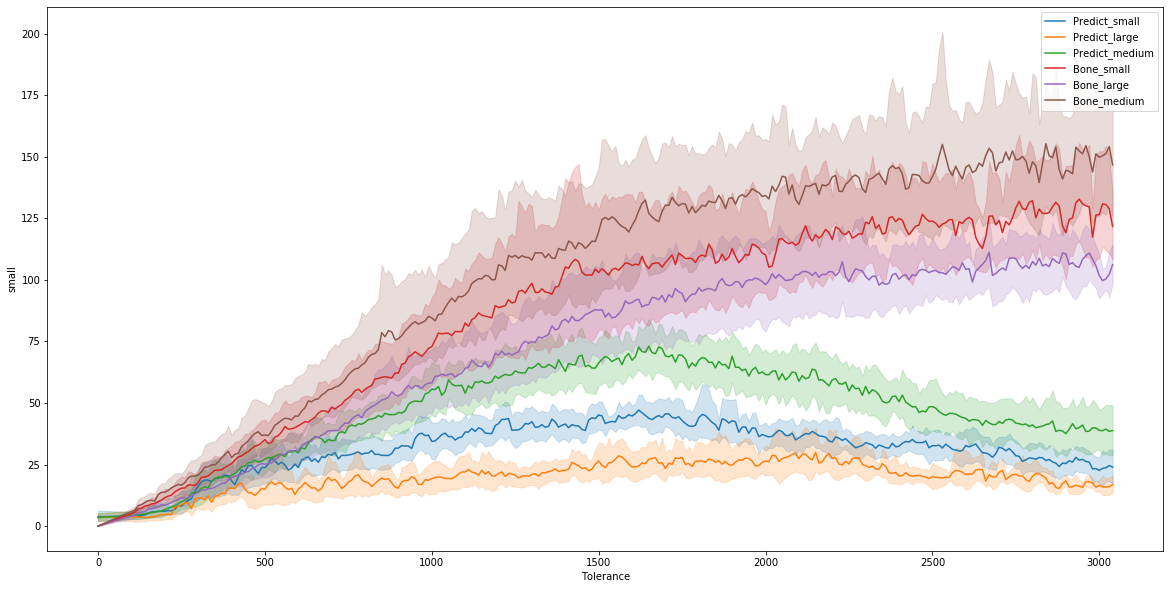

In [24]:
plt.figure(figsize=(20,10))
alphaplot = sns.lineplot(x = 'Tolerance', y = 'small', data = analysisPerScale[:3300], label = 'Predict_small')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'large', data = analysisPerScale[:3300], label = 'Predict_large')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'medium', data = analysisPerScale[:3300], label = 'Predict_medium')

alphaplot = sns.lineplot(x = 'Tolerance', y = 'small', data = analysisBoneDistPerScale[:3300], label = 'Bone_small')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'large', data = analysisBoneDistPerScale[:3300], label = 'Bone_large')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'medium', data = analysisBoneDistPerScale[:3300], label = 'Bone_medium')


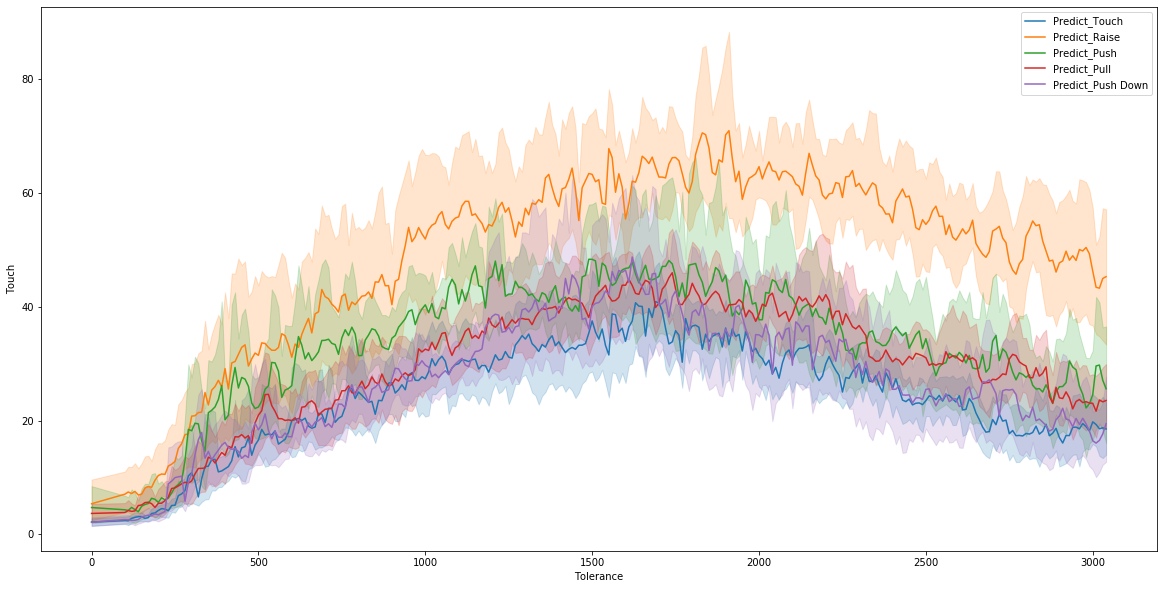

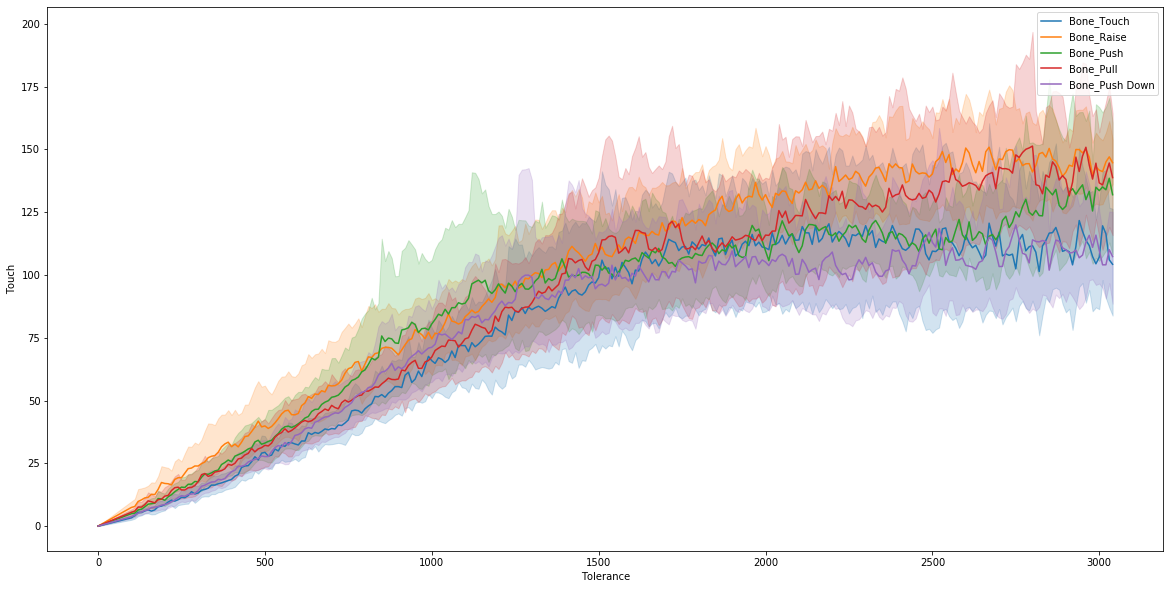

In [48]:
plt.figure(figsize=(20,10))
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Touch', data = analysisPerTask, label = 'Predict_Touch')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Raise', data = analysisPerTask, label = 'Predict_Raise')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push', data = analysisPerTask, label = 'Predict_Push')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Pull', data = analysisPerTask, label = 'Predict_Pull')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push Down', data = analysisPerTask, label = 'Predict_Push Down')


plt.figure(figsize=(20,10))
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Touch', data = analysisBoneDistPerTask, label = 'Bone_Touch')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Raise', data = analysisBoneDistPerTask, label = 'Bone_Raise')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push', data = analysisBoneDistPerTask, label = 'Bone_Push')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Pull', data = analysisBoneDistPerTask, label = 'Bone_Pull')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push Down', data = analysisBoneDistPerTask, label = 'Bone_Push Down')




In [26]:
allConfig.head()

Config  DistBoneInTolTime.0  DistBoneInTolTime.100  DistBoneInTolTime.1000  \
0       0                  0.0               6.694429               18.871343   
1       1                  0.0               7.232980               45.515100   
2       2                  0.0               1.349000                8.551800   
3       3                  0.0               1.901762               24.179500   
4       4                  0.0               1.825909              300.409370   

   DistBoneInTolTime.1010  DistBoneInTolTime.1020  DistBoneInTolTime.1030  \
0               18.860586               19.520843               19.520843   
1               46.807780               35.230100               52.470975   
2               13.821767               11.281325               11.281325   
3               24.157537               24.148500               22.284971   
4              302.566380              277.980691              278.402455   

   DistBoneInTolTime.1040  DistBoneInTolTime.1050  DistBoneInTolTime.1060  \
0               18.231471               18.021257               17.457457   
1               48.578220               48.578220               49.384640   
2               11.281325               11.281325               10.408550   
3               23.057217               25.174512               25.267062   
4              278.129982              277.722218              277.818973   

   ...   Speed.920  Speed.930  Speed.940  Speed.950   Speed.960  Speed.970  \
0  ...   12.304000   6.152000   6.152000  -1.298333         NaN        NaN   
1  ...  -10.367143        NaN        NaN        NaN         NaN   7.032857   
2  ...         NaN   0.000000        NaN        NaN         NaN        NaN   
3  ...    0.000000   0.000000        NaN        NaN         NaN   0.000000   
4  ...  609.366114   6.830636  -0.294464   0.000000  214.073429   0.000000   

   Speed.980  Speed.990       Task   User  
0        NaN   9.099640      Touch  User8  
1   3.516429   7.032857      Raise  User8  
2        NaN        NaN       Pull  User8  
3   0.000000   0.000000       Push  User8  
4   2.527468   2.527468  Push Down  User8  

[5 rows x 1190 columns]

In [27]:
allConfig['DistInTolTime.0'] = allConfig['DistanceInTolTime.0']
allConfig.loc[allConfig['DistanceInTolTime.0'] <= 0, 'DistInTolTime.0'] = 0
#allConfig.loc[allConfig['DistanceInTolTime.0'] > 0, 'DistInTolTime.0'] = allConfig['DistanceInTolTime.0']
allConfig['AbsSpeed.0'] = abs(allConfig['Speed.0'])

for tol in range(100, 2050, 10):
    allConfig['DistInTolTime.'+str(tol)] = allConfig['DistanceInTolTime.'+str(tol)]
    allConfig.loc[allConfig['DistanceInTolTime.'+str(tol)] <= 0, 'DistInTolTime.'+str(tol)] = 0
    #allConfig.loc[allConfig['DistanceInTolTime.'+str(tol)] > 0, 'DistInTolTime.'+str(tol)] = allConfig['DistanceInTolTime.'+str(tol)]
    allConfig['AbsSpeed.'+str(tol)] = abs(allConfig['Speed.'+str(tol)])

In [28]:
speedTol = pd.DataFrame()
i = 0
speedTol.loc[0, 'AbsSpeed'] = allConfig['AbsSpeed.0'].dropna().mean()
for user in range(0, nbUsers):
    cond = allConfig['User'] == list_names[user]
    speedTol.loc[0, list_names[user]] = allConfig[cond]['AbsSpeed.0'].dropna().mean()
    for tol in range(300, 2050, 50):
        speedTol.loc[tol, 'AbsSpeed'] = allConfig['AbsSpeed.'+str(tol)].dropna().mean()
        speedTol.loc[tol, list_names[user]] = allConfig[cond]['AbsSpeed.'+str(tol)].dropna().mean()
    
    

In [29]:
speedTol

AbsSpeed       User1      User3      User4      User5      User6  \
0      6.098089   11.122724   5.338329   7.572175   6.293142   3.575599   
300    4.227442   32.738468   2.836044   6.718604   1.107075   0.330596   
350    3.434191   19.082996   2.207368   6.218476   0.509686   0.665445   
400    5.194682   39.288949   5.601022   5.289949   0.919902   0.039857   
450    7.168632   58.624645   3.822510   4.481849   2.371076   1.371952   
500    5.897073   31.283293   1.628719  19.723141   0.442243   1.276589   
550    5.683673   31.448843   0.697285  14.805006   3.111775   1.309913   
600    8.345393   56.197744   5.401098  13.054707   0.549354   3.149898   
650   10.163384   57.708154   3.909702   8.332949   3.756577   6.208970   
700   10.679872   76.968489   4.608764  19.884692   0.495131   1.953699   
750   11.988500  102.738142   2.523776  14.761858   2.053884   4.346599   
800   16.901210  150.018982   4.196643   9.547234   0.305055   0.977309   
850   11.263449   60.020650   2.555040  21.727012   6.807339   5.049185   
900   17.338081  127.552959   5.310246  14.819070   1.740103   4.453493   
950   23.542099  177.139814   3.164683  21.875942   0.605916   2.987677   
1000  24.466935  116.895080  14.052344  44.941292  12.800398   2.567944   
1050  19.833602  101.827431  32.420784  17.616496   1.025711   5.537164   
1100  16.758297  147.273217   3.296101  16.158777   0.314948   5.378430   
1150  18.852823  147.078033   4.019130  16.281531   6.152576   7.675962   
1200  18.639681  103.911314   2.102027  44.903483   6.580267   3.090917   
1250  23.752389  135.910521   3.618526  60.442518   1.363919   3.752750   
1300  17.852150  136.076108   3.495370  13.282413   2.666474   4.645010   
1350  12.099873   39.485749   3.014129   9.171764   0.861384   5.081883   
1400  12.911013  130.582654   0.779204   1.881543   1.358705   6.708334   
1450  16.319672  136.431936   1.916041  19.297541   0.401234   5.351477   
1500  18.902405  190.191167   4.163412   5.629976   0.441647   7.636562   
1550  17.811796  212.629205   2.874373   3.319698   0.105429   2.911325   
1600  10.680178   80.529268   1.943009   3.513315   0.293168   9.820419   
1650  11.238253   65.702152   1.234062   8.172415   0.290803  15.419154   
1700  10.048554   53.679155   2.266037   3.257601   0.108797  18.423435   
1750  10.166517  118.260935   0.231610   1.951125   0.416478   4.911142   
1800  11.037886  155.635070   0.770243   0.412807   1.879599   7.407658   
1850  11.486653   87.777523   0.627016  11.375815   0.599916  12.090900   
1900  14.528383  101.823854   0.479481   2.719485   1.085922   8.764212   
1950  11.631164  162.382190   2.673987   1.667971   3.262685  18.354677   
2000   8.413253   91.276636   0.540858   0.670384   0.314597   4.827113   

          User7      User8  
0      4.725028   3.959173  
300    1.496497   1.916898  
350    3.401487   0.218249  
400    0.878200   0.767009  
450    1.094760   5.214226  
500    1.578634   5.421204  
550    2.660297   2.000638  
600    3.708517   3.603810  
650    2.625355   6.846187  
700    7.173442   3.521210  
750    2.546371   5.234456  
800    4.086234  11.237747  
850    5.368695   6.812029  
900    3.555879  14.683348  
950    5.588387  16.418538  
1000  14.062990   9.175280  
1050   3.664818   5.922134  
1100   8.032481   4.800951  
1150   7.265408   2.592982  
1200   8.283288   3.855666  
1250  25.027103   8.438445  
1300   4.706124  11.039941  
1350   6.848433  31.309405  
1400   5.330787   6.572044  
1450   9.886366   2.466013  
1500   0.913043   6.450264  
1550   5.923463   8.401863  
1600   7.150274   2.988740  
1650  11.547254  10.639495  
1700  18.742846   5.918585  
1750   1.577925   7.202348  
1800   3.038212   3.160822  
1850   2.779628  11.641459  
1900   7.786514  13.234087  
1950   0.094448   4.638161  
2000   1.648465  19.063424

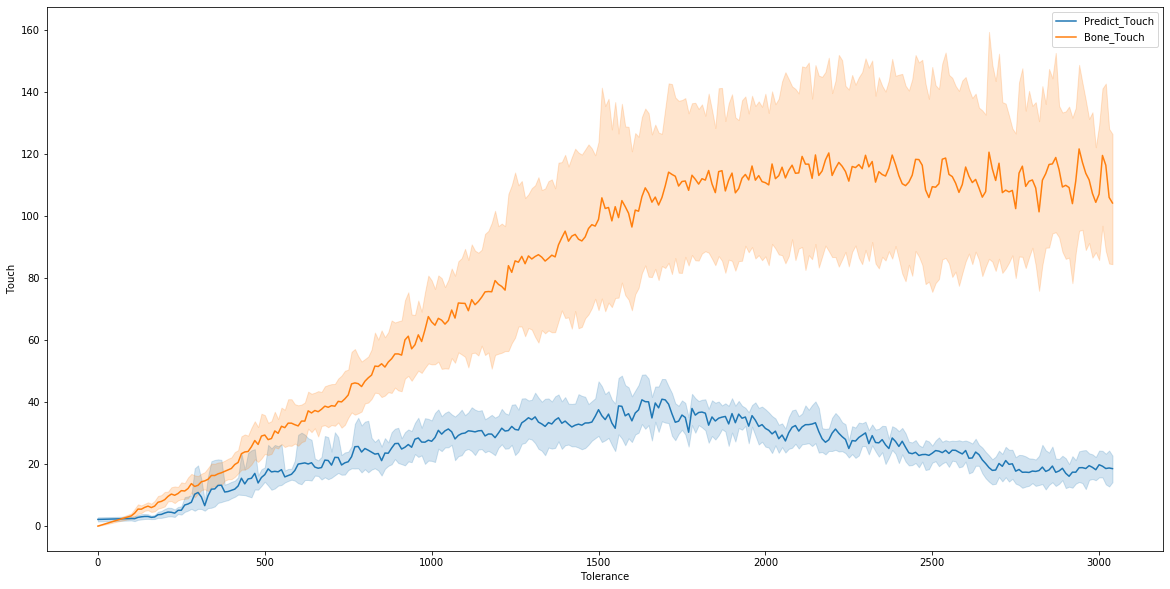

In [47]:
plt.figure(figsize=(20,10))
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Touch', data = analysisPerTask, label = 'Predict_Touch')
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Raise', data = analysisPerTask, label = 'Predict_Raise')
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push', data = analysisPerTask, label = 'Predict_Push')
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Pull', data = analysisPerTask, label = 'Predict_Pull')
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push Down', data = analysisPerTask, label = 'Predict_Push Down')

alphaplot = sns.lineplot(x = 'Tolerance', y = 'Touch', data = analysisBoneDistPerTask, label = 'Bone_Touch')
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Raise', data = analysisBoneDistPerTask, label = 'Bone_Raise')
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push', data = analysisBoneDistPerTask, label = 'Bone_Push')
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Pull', data = analysisBoneDistPerTask, label = 'Bone_Pull')
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push Down', data = analysisBoneDistPerTask, label = 'Bone_Push Down')

#alphaplot = sns.lineplot(x = speedTol.index, y = 'AbsSpeed', data = speedTol, label = 'MeanSpeed')


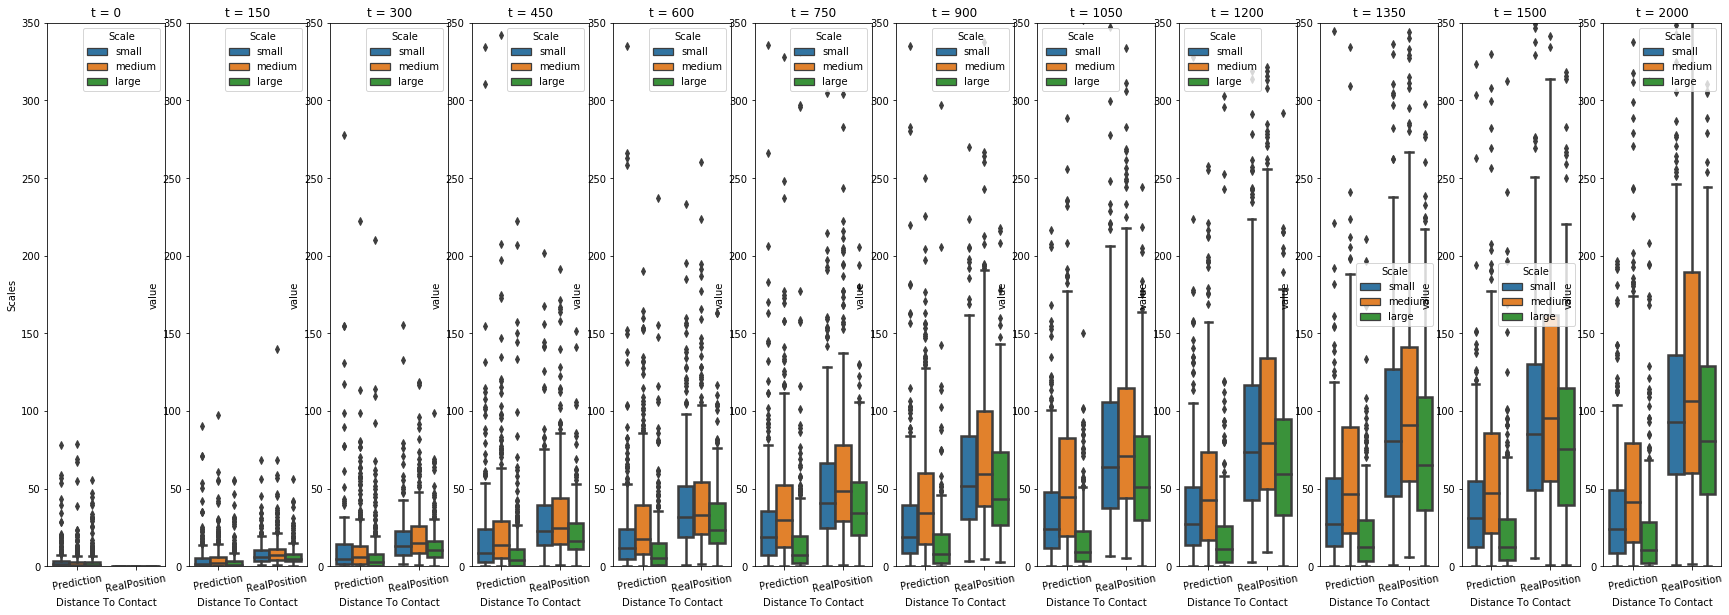

In [31]:
nameAx = []
nameFig = []
#tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]
tolTime = [0, 150, 300, 450, 600, 750, 900, 1050, 1200, 1350, 1500, 2000]
lim = [50, 150, 300, 300, 300, 300, 400, 400, 400, 500, 500, 500]
for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))



for i in range(0, len(tolTime)):

    mdf = pd.DataFrame()
    cdf = pd.DataFrame()
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()
    df1 = pd.DataFrame(allConfig['DistInTolTime.'+str(tolTime[i])]).assign(Trial=1)
    df1['Scale'] = allConfig['Scale']
    df2 = pd.DataFrame(allConfig['DistBoneInTolTime.'+str(tolTime[i])]).assign(Trial=2)
    df2['DistInTolTime.'+str(tolTime[i])] = allConfig['DistBoneInTolTime.'+str(tolTime[i])]
    df2['Scale'] = allConfig['Scale']
    df2.assign(Trial=2)
    cdf = pd.concat([df1, df2], sort = False)                                # CONCATENATE
    mdf = pd.melt(cdf, id_vars=['Trial','Scale'],value_vars='DistInTolTime.'+str(tolTime[i]), var_name = 'DistInTolTime.'+str(tolTime[i]))

    nameFig[i] = sns.boxplot(x="Trial", y="value", hue = 'Scale', data=mdf, linewidth = 2.5, ax = nameAx[i])  # RUN PLOT   
    #nameFig[i] = sns.boxplot(x = "Scale", y = 'DistInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])

    #, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Scales')
    nameFig[i].set_xlabel('Distance To Contact')#, t ='+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    #nameFig[i].set_ylim(0, lim[i])
    
for ax in nameFig:
    tl = ['Prediction', 'RealPosition']#ax.get_xticklabels()#['Prediction/Contact', 'RealPosition/Contact'])
    ax.set_xticklabels(tl, rotation=10)
    ax.set_ylim(0, 350)


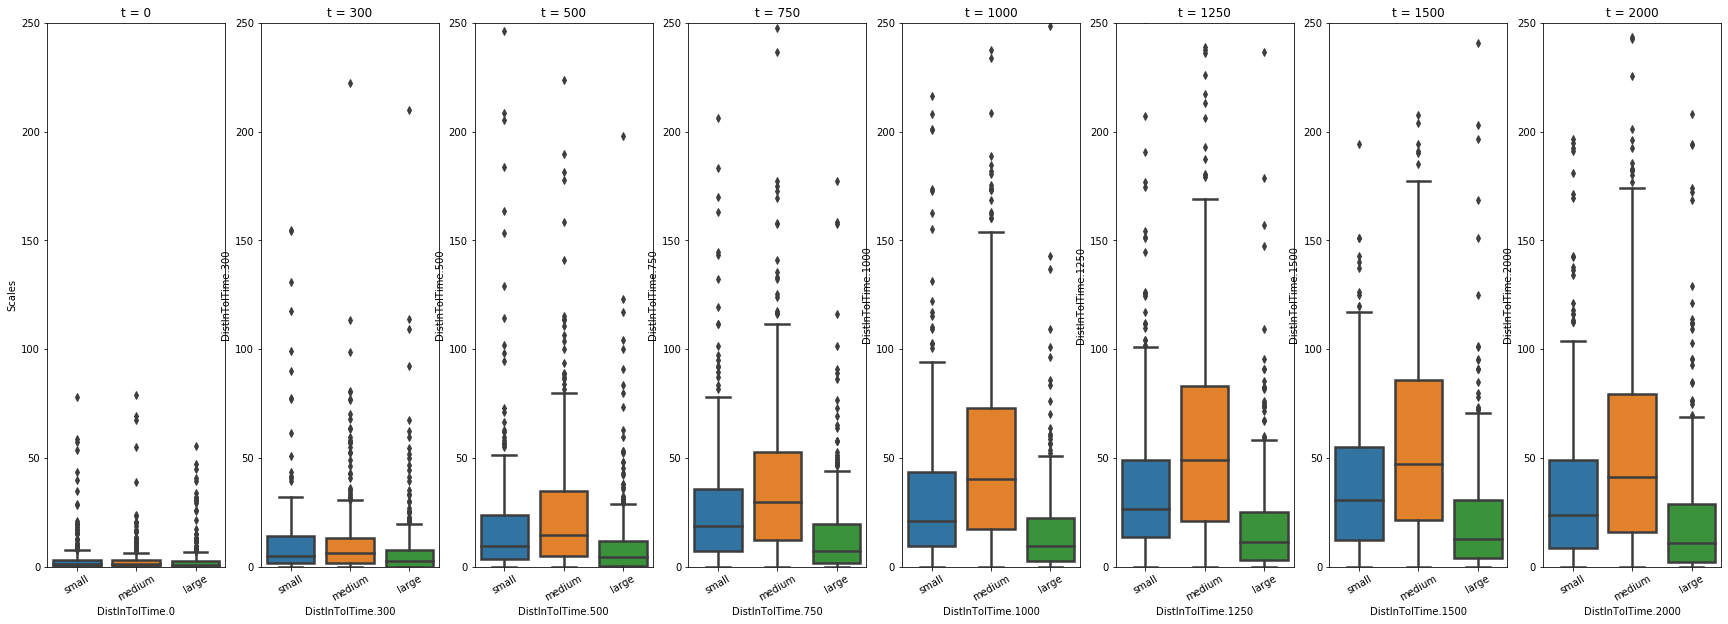

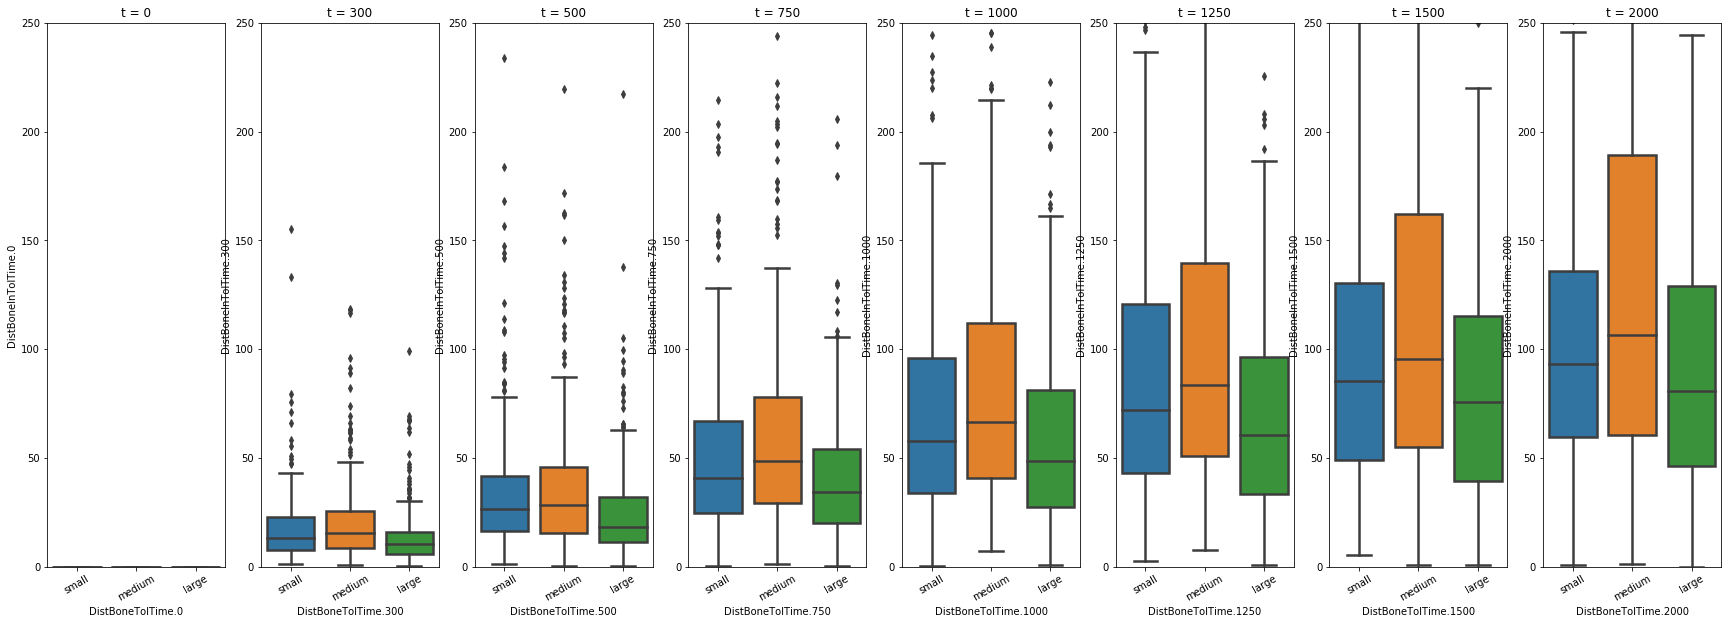

In [32]:
nameAx = []
nameFig = []
tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))



for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Scale", y = 'DistInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])

    #, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Scales')
    nameFig[i].set_xlabel('DistInTolTime.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 250)
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))



for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Scale", y = 'DistBoneInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    #nameFig[0].set_ylabel('Scales')
    nameFig[i].set_xlabel('DistBoneTolTime.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 250)


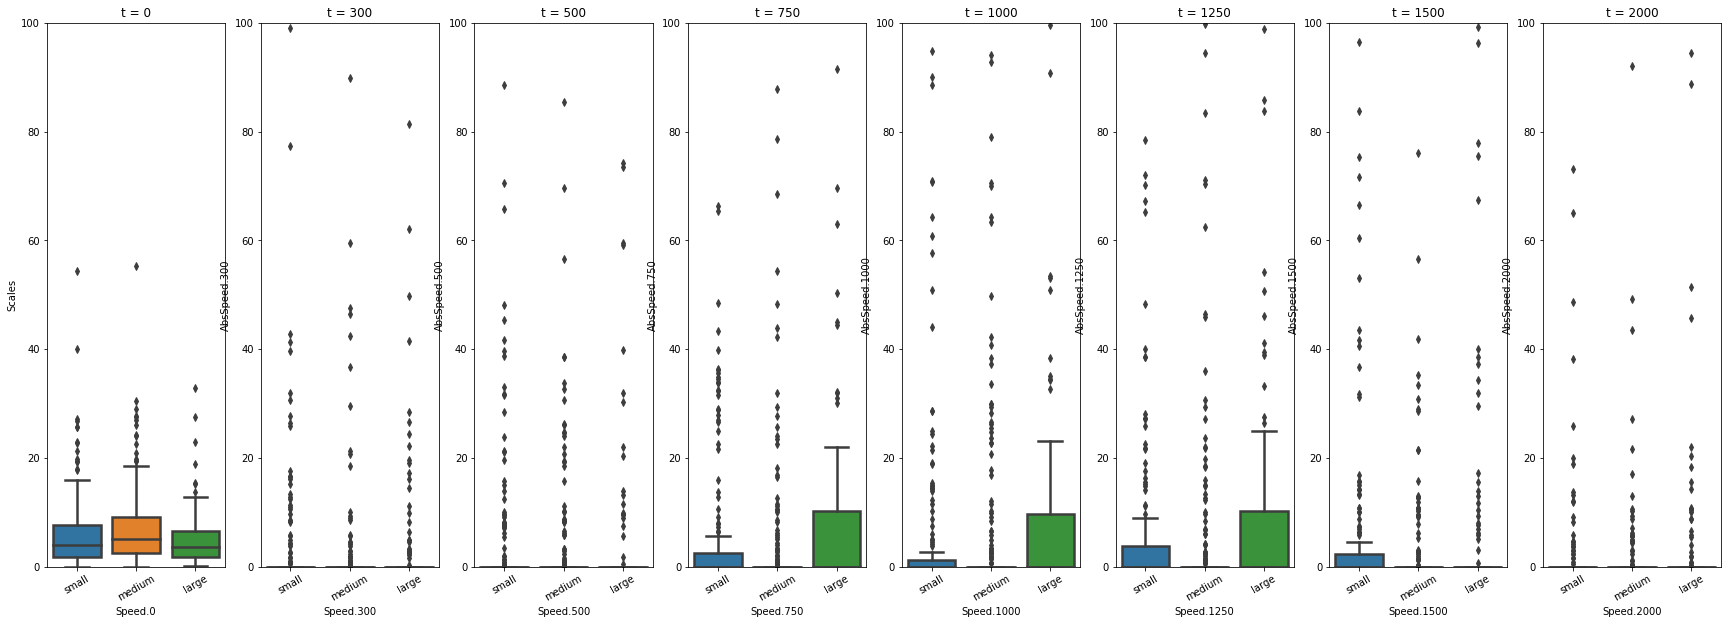

In [33]:
nameAx = []
nameFig = []
tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Scale", y = 'AbsSpeed.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])
    #nameFig[i] = sns.lineplot(x = i, y = 'AbsSpeed.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])

    
    #, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Scales')
    nameFig[i].set_xlabel('Speed.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 100)

    

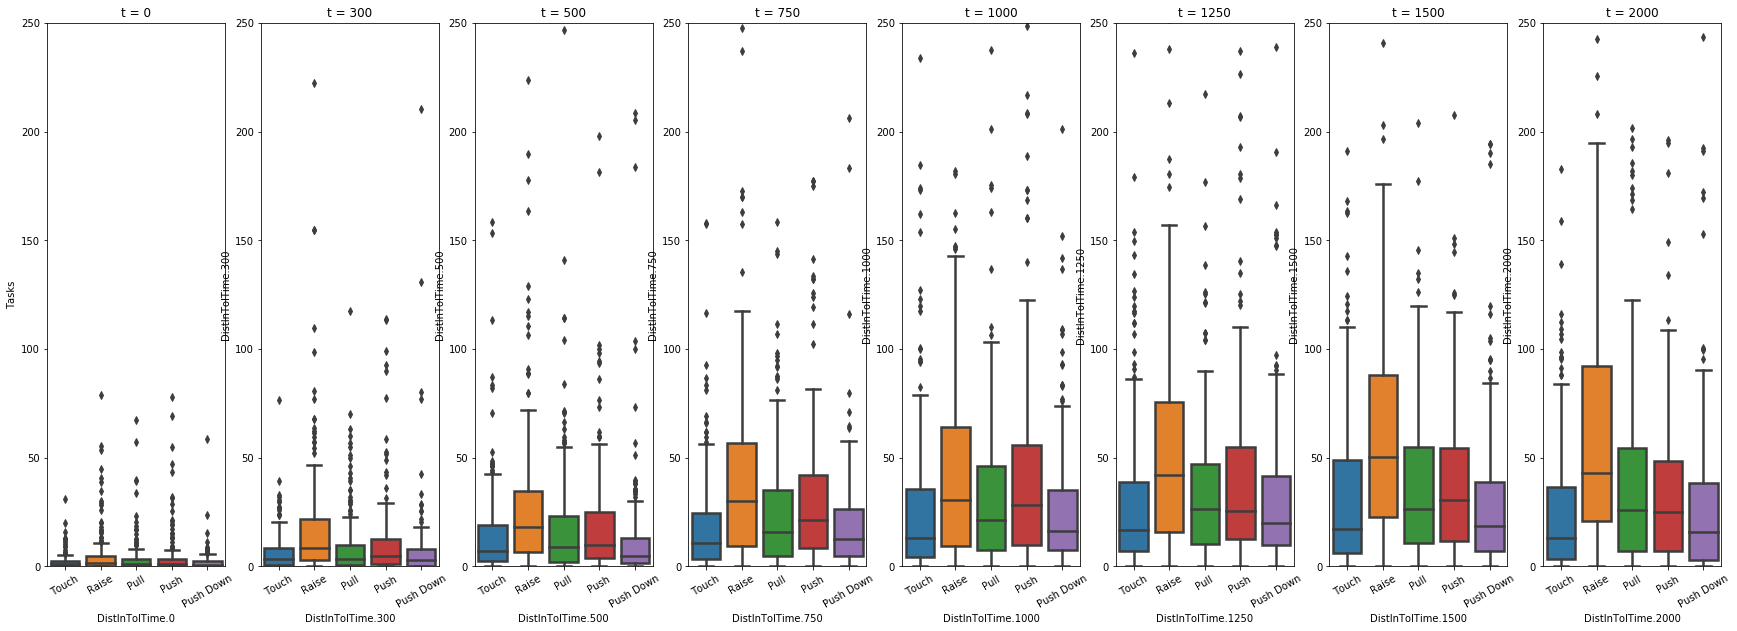

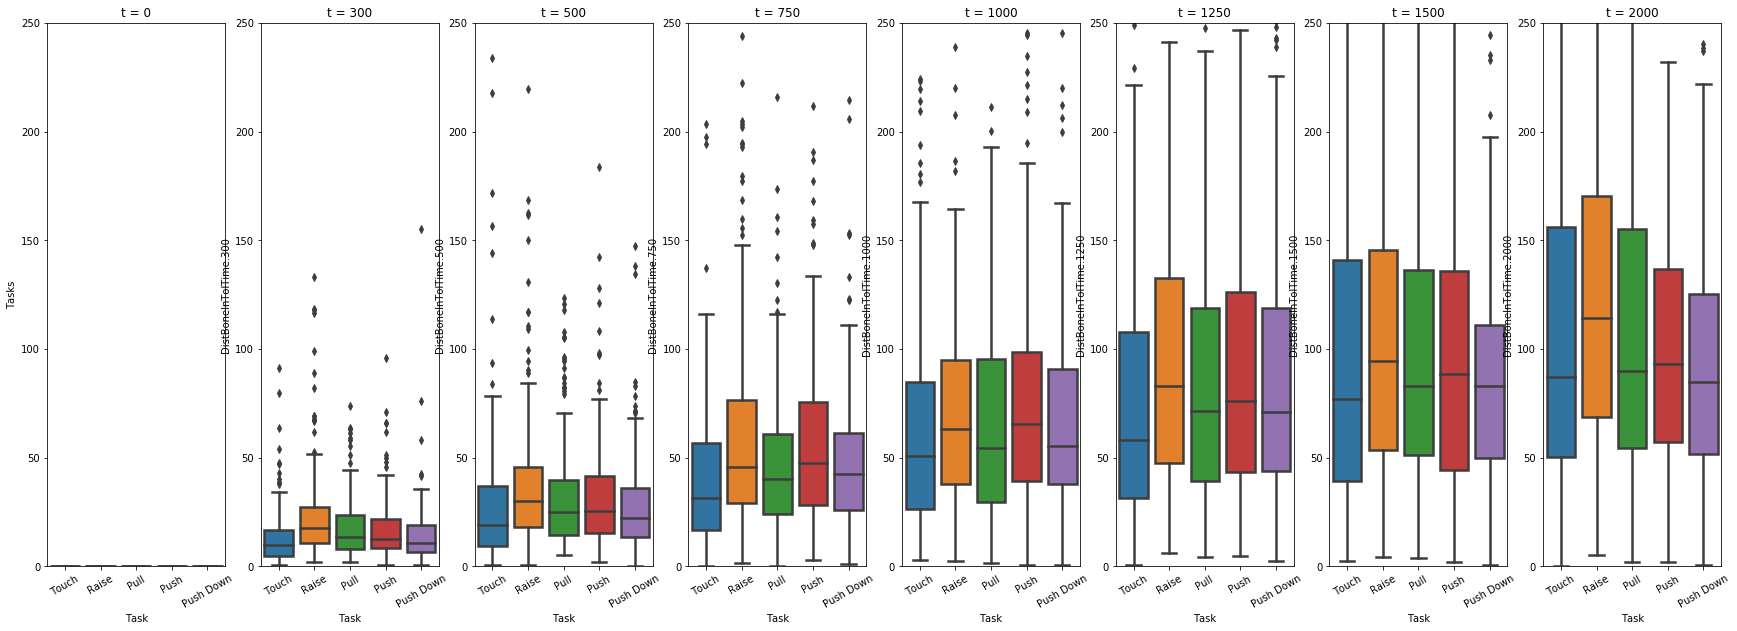

In [34]:
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))



for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Task", y = 'DistInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Tasks')
    nameFig[i].set_xlabel('DistInTolTime.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 250)

    
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Task", y = 'DistBoneInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Tasks')
    #nameFig[i].set_xlabel('DistInTolTime.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 250)


In [35]:
allConfig['Obj'].iloc[77], allConfig['Scale'].iloc[77], allConfig['Task'].iloc[77]

('Cube', 'medium', 'Touch')

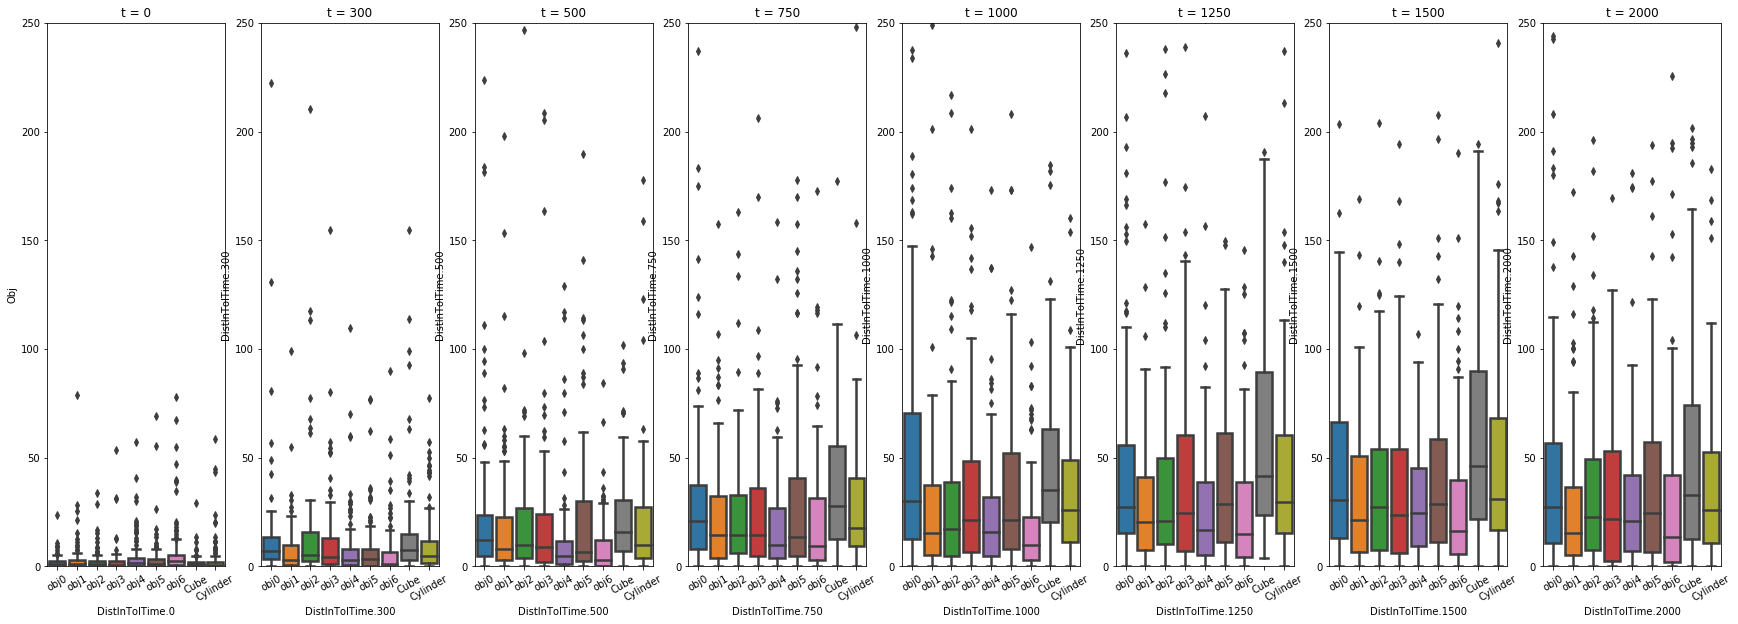

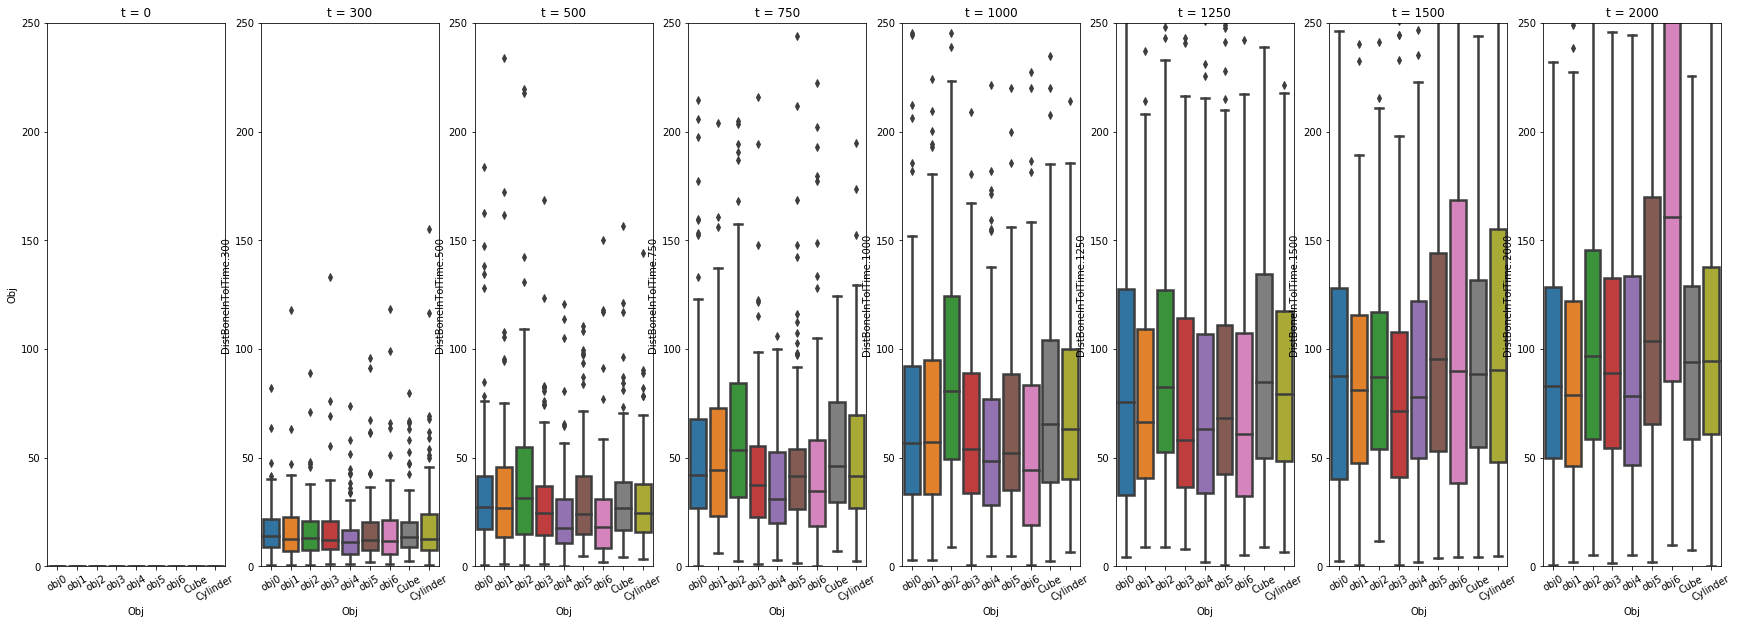

In [36]:
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))



for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Obj", y = 'DistInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Obj')
    nameFig[i].set_xlabel('DistInTolTime.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 250)
    
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Obj", y = 'DistBoneInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Obj')
    #nameFig[i].set_xlabel('DistInTolTime.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 250)


In [37]:
taskScale = pd.DataFrame()

tol = 300
for size in range(0, len(scales)):
    for gest in range (0, len(tasks)):
        #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
        mean = 0
        for users in range(0, nbUsers):
            cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size]) & (allConfig['User'] == list_names[users])            
            mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

        taskScale.loc[scales[size], tasks[gest]] = mean/nbUsers
        
        
taskObj = pd.DataFrame()        
for obj in range(0, len(objects)):
    for gest in range (0, len(tasks)):
        #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
        mean = 0
        for users in range(0, nbUsers):
            cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
            mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

        taskObj.loc[objects[obj], tasks[gest]] = mean/nbUsers
        
        
scaleObj = pd.DataFrame()        
for obj in range(0, len(objects)):
    for size in range (0, len(scales)):
        #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
        mean = 0
        for users in range(0, nbUsers):
            cond = (allConfig['Scale'] == scales[size]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
            mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

        scaleObj.loc[scales[size], objects[obj]] = mean/nbUsers

In [38]:
taskObj

Touch      Raise       Pull       Push  Push Down
obj0       7.867764  23.792817   9.349756  34.171978  13.436671
obj1       6.324665  10.748281   7.541233   8.855436   3.781560
obj2       7.834182  21.653564   9.252323  55.851222  16.509452
obj3      47.115370  46.281605   6.010725  11.282482  35.757079
obj4       2.055233  18.771710  10.520892   6.598723   4.199948
obj5       7.126664  15.828418   5.830212   8.152267   3.306482
obj6       2.568040   6.912412   9.526244  10.776111   3.083143
Cube       9.719013  23.318535  11.834883  20.848932   8.676839
Cylinder   6.980427  20.593739  14.573218   6.829483   6.792285

In [39]:
taskScale

Touch      Raise       Pull       Push  Push Down
small   11.238443  24.567638   9.384843  26.775608   9.868627
medium   7.763429  22.662658  13.740425  19.271264   6.636436
large   13.528580  15.039449   5.021334   8.465046  15.342757

In [40]:
scaleObj

obj0       obj1       obj2       obj3      obj4       obj5  \
small   14.144598   5.366931  38.455539  36.467958  7.225442   7.223786   
medium  34.637158  12.495081  15.338377  12.030343  9.262457  11.604299   
large    4.389635   4.363117  12.032699  39.370055  8.800004   5.068613   

            obj6       Cube   Cylinder  
small   9.969043  18.382297   9.136101  
medium  4.490076  13.230799  13.328318  
large   5.260450  13.518926  10.511399

In [41]:

tol = 1250


for users in range(0, nbUsers):
    cond = (allConfig['Task'] == 'Raise') & (allConfig['Scale'] == 'medium') & (allConfig['User'] == list_names[users])            
    print(1250, 'raise', list_names[users], allConfig[cond]['DistInTolTime.'+str(tol)], allConfig[cond]['Obj'])
    
for users in range(0, nbUsers):
    cond = (allConfig['Scale'] == 'medium') & (allConfig['Obj'] == 'obj5') & (allConfig['User'] == list_names[users])            
    print(1250, 'obj5',list_names[users], allConfig[cond]['DistInTolTime.'+str(tol)], allConfig[cond]['Task'])
    
for users in range(0, nbUsers):
    cond = (allConfig['Scale'] == 'medium') & (allConfig['Obj'] == 'obj0') & (allConfig['User'] == list_names[users])            
    print(1250, 'obj0',list_names[users], allConfig[cond]['DistInTolTime.'+str(tol)], allConfig[cond]['Task'])

    
tol = 750


for users in range(0, nbUsers):
    cond = (allConfig['Task'] == 'Raise') & (allConfig['Scale'] == 'medium') & (allConfig['User'] == list_names[users])            
    print(750, 'raise', list_names[users], allConfig[cond]['DistInTolTime.'+str(tol)], allConfig[cond]['Obj'])
    
for users in range(0, nbUsers):
    cond = (allConfig['Scale'] == 'medium') & (allConfig['Obj'] == 'obj5') & (allConfig['User'] == list_names[users])            
    print(750, 'obj5',list_names[users], allConfig[cond]['DistInTolTime.'+str(tol)], allConfig[cond]['Task'])
    
for users in range(0, nbUsers):
    cond = (allConfig['Scale'] == 'medium') & (allConfig['Obj'] == 'obj0') & (allConfig['User'] == list_names[users])            
    print(750, 'obj0',list_names[users], allConfig[cond]['DistInTolTime.'+str(tol)], allConfig[cond]['Task'])

1250 raise User1 44     33.890067
49    128.321054
54     64.741672
59     69.297060
64     40.221519
69      9.655244
74    128.275399
79    187.280625
83    213.085521
Name: DistInTolTime.1250, dtype: float64 44        obj0
49        obj1
54        obj2
59        obj3
64        obj4
69        obj5
74        obj6
79        Cube
83    Cylinder
Name: Obj, dtype: object
1250 raise User3 46     32.820736
51     41.431204
56    237.790940
61     69.164869
66     42.109054
71    115.632647
76     92.435982
81    180.268493
86     42.860353
Name: DistInTolTime.1250, dtype: float64 46        obj0
51        obj1
56        obj2
61        obj3
66        obj4
71        obj5
76        obj6
81        Cube
86    Cylinder
Name: Obj, dtype: object
1250 raise User4 46     110.167397
51      32.235669
60     119.456479
65      77.481793
70      55.989621
75     145.384999
80     105.625651
85      98.281065
134           NaN
Name: DistInTolTime.1250, dtype: float64 46         obj0
51         obj1
60    

In [42]:
who = 56

allConfig[allConfig.index == who]['Obj'], allConfig[allConfig.index == who]['Task'], allConfig[allConfig.index == who]['Scale']

(56    obj2
 56    obj2
 56    obj2
 56    obj2
 56    obj2
 56    obj2
 56    obj2
 Name: Obj, dtype: object, 56    Push Down
 56        Raise
 56        Raise
 56        Raise
 56         Pull
 56        Raise
 56         Push
 Name: Task, dtype: object, 56    medium
 56    medium
 56    medium
 56    medium
 56    medium
 56    medium
 56    medium
 Name: Scale, dtype: object)

# Scales and Tasks

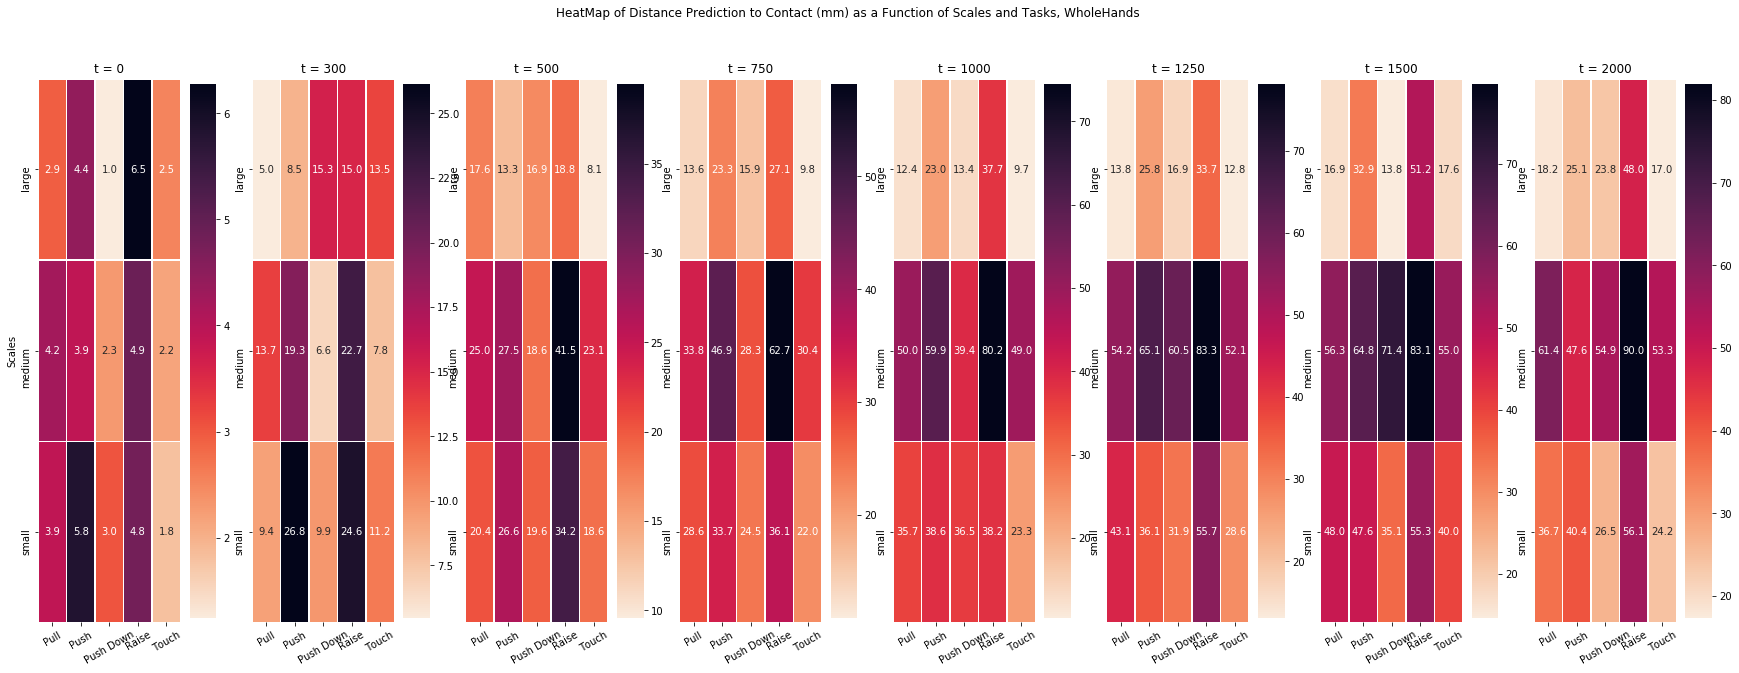

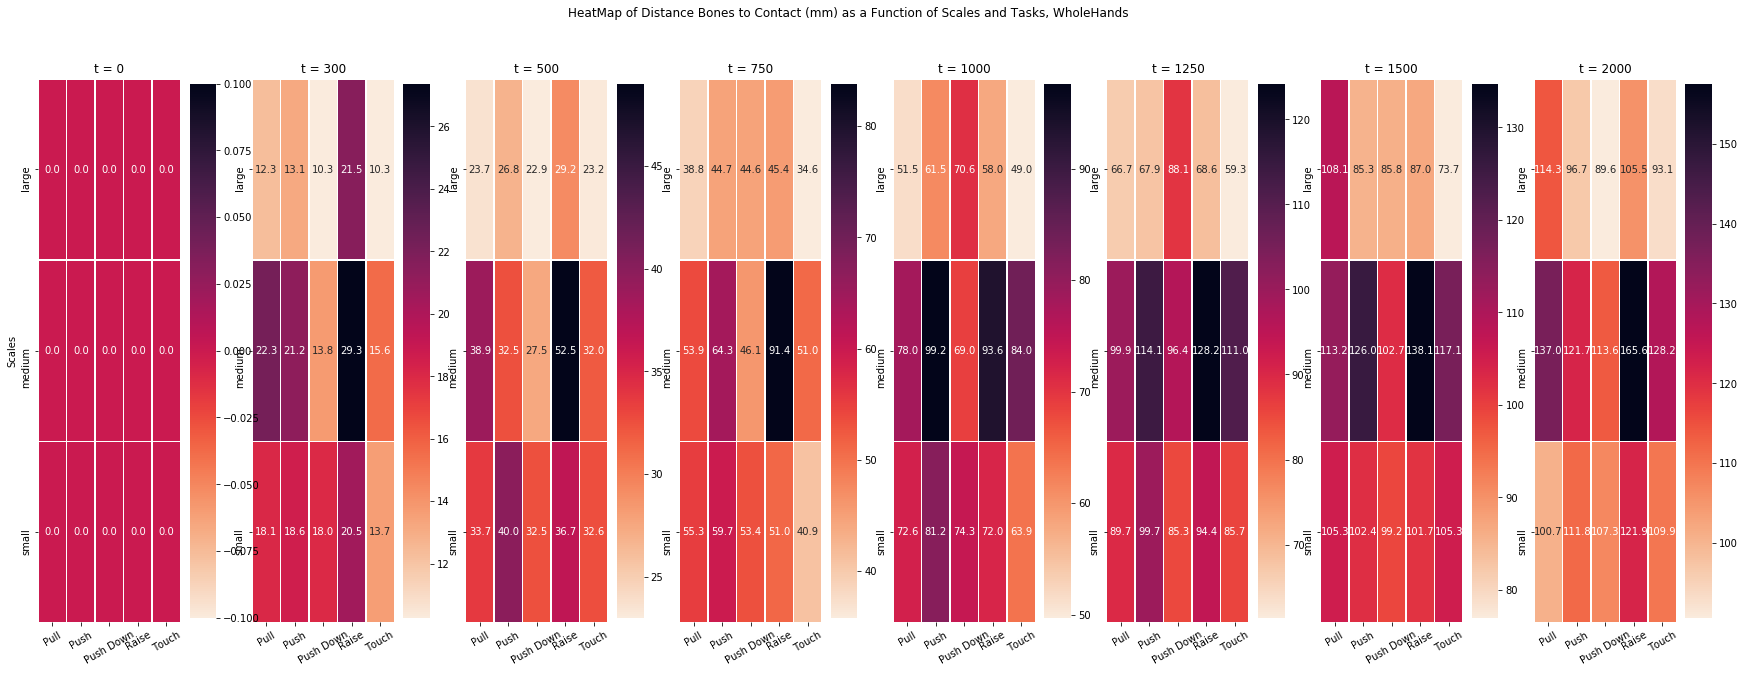

In [43]:
nameAx = []
nameFig = []
tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]
#tolTime = [0, 100, 200, 300, 400, 500, 600, 750, 1000, 1250, 1500, 2000]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    taskScale = pd.DataFrame()

    tol = tolTime[i]
    for size in range(0, len(scales)):
        for gest in range (0, len(tasks)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size]) & (allConfig['User'] == list_names[users])            
                mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

            taskScale.loc[scales[size], tasks[gest]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(taskScale.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Scales')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    
f.suptitle('HeatMap of Distance Prediction to Contact (mm) as a Function of Scales and Tasks, WholeHands')    
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))
cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    taskScale = pd.DataFrame()

    tol = tolTime[i]
    for size in range(0, len(scales)):
        for gest in range (0, len(tasks)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size]) & (allConfig['User'] == list_names[users])            
                mean += allConfig[cond]['DistBoneInTolTime.'+str(tol)].mean()

            taskScale.loc[scales[size], tasks[gest]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(taskScale.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Scales')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)

f.suptitle('HeatMap of Distance Bones to Contact (mm) as a Function of Scales and Tasks, WholeHands')

plt.show()

In [44]:

tol = 300
scaleObj = pd.DataFrame()        
for obj in range(0, len(objects)):
    for size in range (0, len(scales)):
        #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
        mean = 0
        for users in range(0, nbUsers):
            cond = (allConfig['Scale'] == scales[size]) & (allConfig['Obj'] == 'obj6') & (allConfig['User'] == list_names[users])            
            mean += allConfig[cond]['DistInTolTime.'+str(tol)]
            

# Scales and Objects

KeyError: 'DistInTolTime.0'

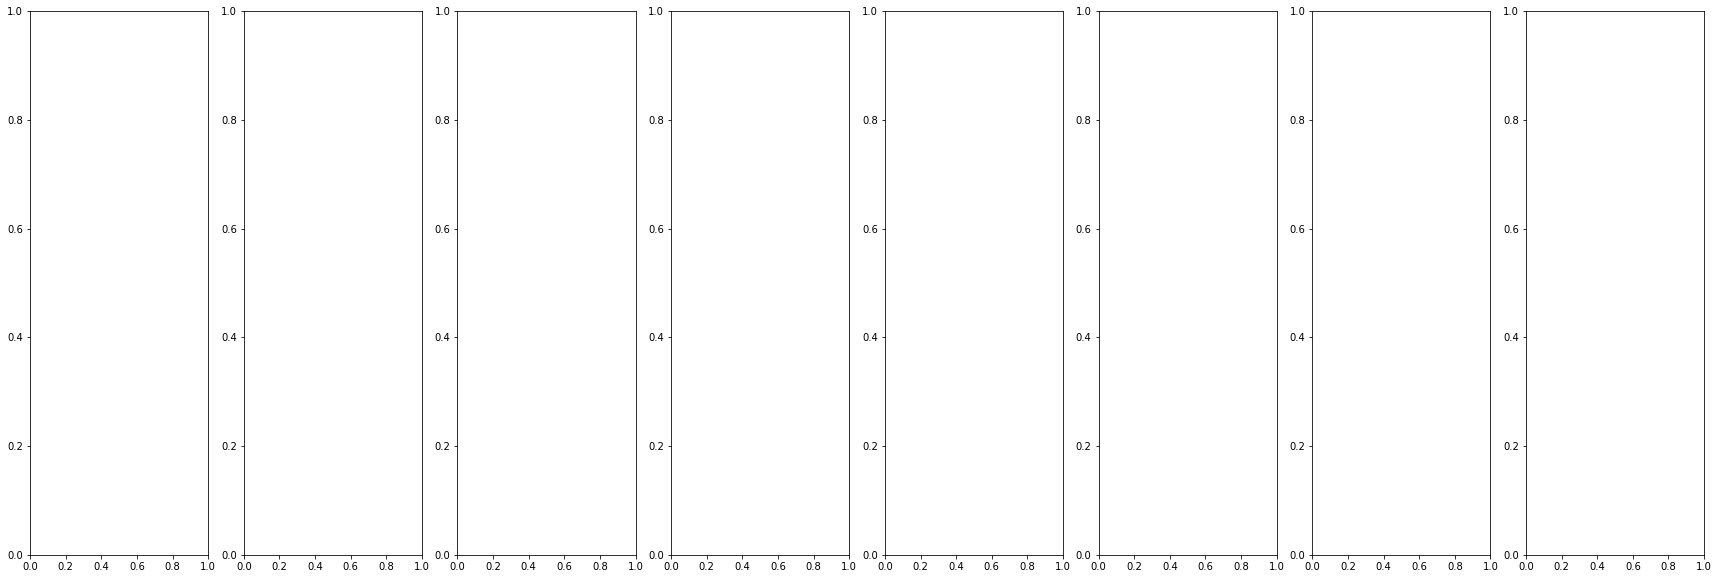

In [45]:
nameAx = []
nameFig = []
tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    tol = tolTime[i]
    scaleObj = pd.DataFrame()        
    for obj in range(0, len(objects)):
        for size in range (0, len(scales)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Scale'] == scales[size]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])          
                mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

            scaleObj.loc[objects[obj], scales[size]] = mean/nbUsers        
            
    nameFig[i] = sns.heatmap(scaleObj.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Objects')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    
f.suptitle('HeatMap of Distance Prediction to Contact (mm) as a Function of Scales and Objects, WholeHands')    
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))
cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    tol = tolTime[i]

    scaleObj = pd.DataFrame()        
    for obj in range(0, len(objects)):
        for size in range (0, len(scales)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Scale'] == scales[size]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
                mean += allConfig[cond]['DistBoneInTolTime.'+str(tol)].mean()

            scaleObj.loc[objects[obj], scales[size]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(scaleObj.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Objects')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)

f.suptitle('HeatMap of Distance Bones to Contact (mm) as a Function of Scales and Objects, WholeHands')

plt.show()

# Tasks and Objects

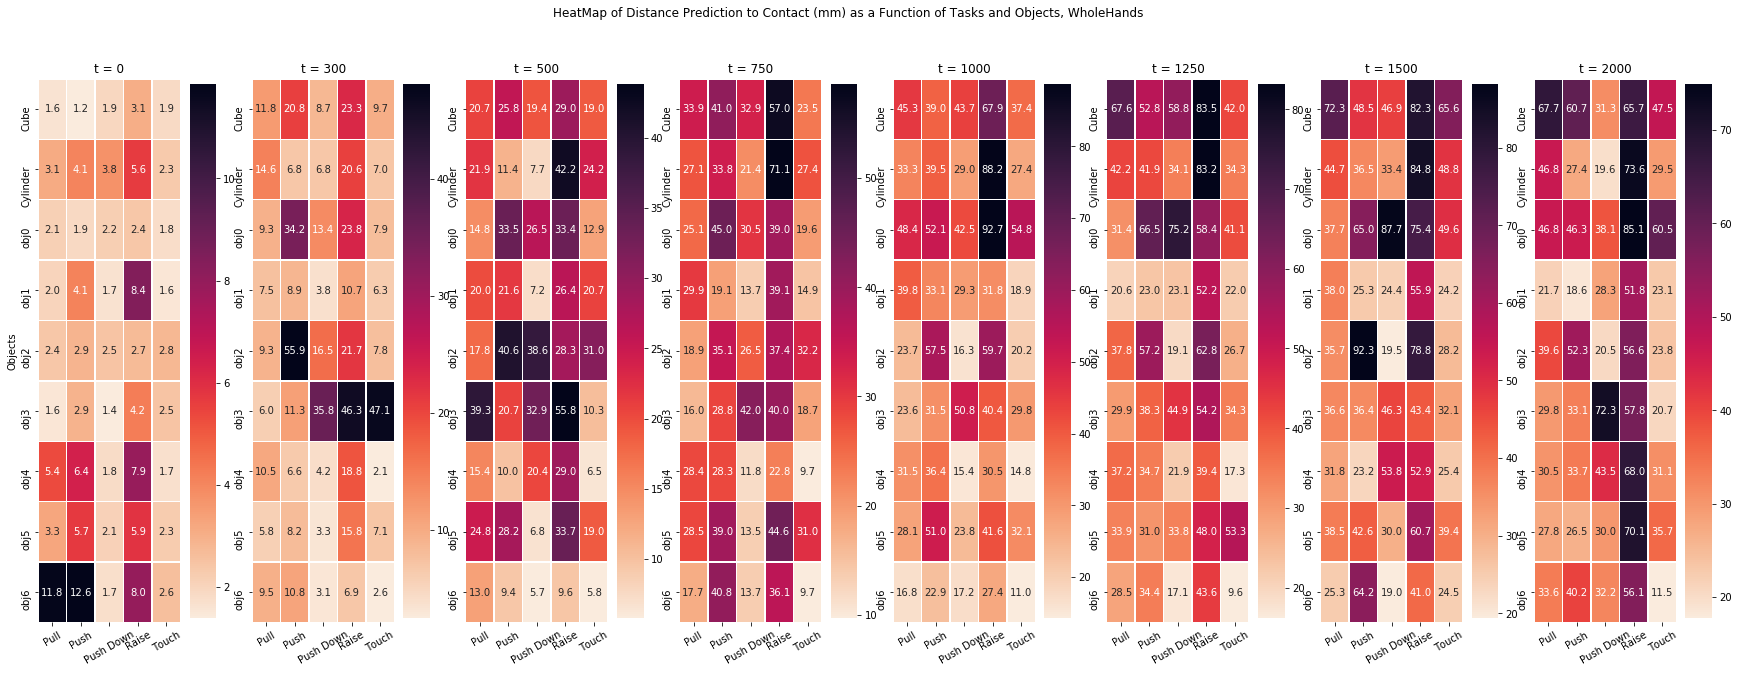

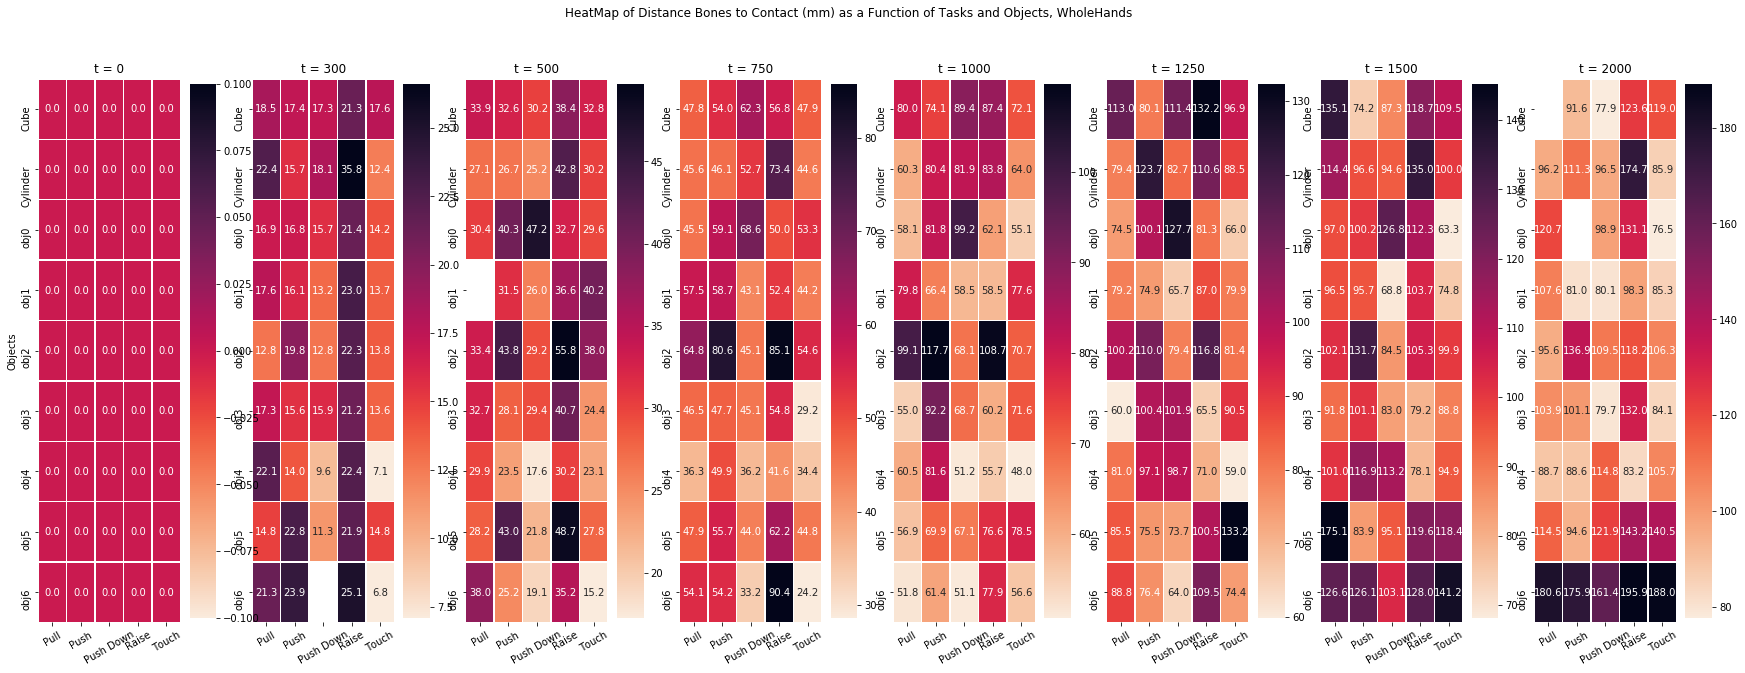

In [46]:
nameAx = []
nameFig = []
tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    tol = tolTime[i]
    taskObj = pd.DataFrame()        
    for obj in range(0, len(objects)):
        for gest in range (0, len(tasks)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
                mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

            taskObj.loc[objects[obj], tasks[gest]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(taskObj.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Objects')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    
f.suptitle('HeatMap of Distance Prediction to Contact (mm) as a Function of Tasks and Objects, WholeHands')    
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))
cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    tol = tolTime[i]

    taskObj = pd.DataFrame()        
    for obj in range(0, len(objects)):
        for gest in range (0, len(tasks)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
                mean += allConfig[cond]['DistBoneInTolTime.'+str(tol)].mean()

            taskObj.loc[objects[obj], tasks[gest]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(taskObj.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Objects')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)

f.suptitle('HeatMap of Distance Bones to Contact (mm) as a Function of Tasks and Objects, WholeHands')

plt.show()